In [1]:
import pandas as pd
import re

# Define and assign topics

## Define topic by keywords
This is based on the exploration of the article titles.

In [3]:
topic2keywords= {
    'reinforcement learning': ['reinforcement learning', 'deep reinforcement', 'agent',  'deep reinforcement learning', 'reinforcement', 'off-policy', 'actor-critic',  'markov decision process', 'markov decision processes'], # , 'rl'
    'offline reinforcement learning': ['offline reinforcement learning', 'offline reinforcement', 'offline'],
    'graph': ['graph', 'graphs',  'graph neural networks',  'knowledge graph',  'graph convolutional',  'graph convolutional network',  'graph representation learning', 'gnn',  'graph convolutional networks'],
    'optimization': ['optimization',  'constrain',],
    'zero_few-shot': ['low',  'shot learning',  'zero-shot',  'weak', 'few-shot learning', 'self-supervised',],
    'transformer': ['transformer', 'attention',  'vision transformer',  'transformers',  'bert', 'scaling', 'vision transformers'], #  
    'representation': ['representation', 'graph representation learning',  'representations',],
    'generative model': ['generative model','generation', 'generative', 'generative models',  'variational autoencoders',  'deep generative models', 'vae',  'image generation'] ,
    'online learning': ['online learning', 'online'],
    'adaptive': ['adaptive'],
    'bayesian': ['bayes', 'bayesian'],  # new
    'contrastive learning': ['contrastive',  'contrastive learning',  'contrastive representation'], 
    'inference': ['inference'],
    'metric': ['metric'],
    'meta-learning': ['meta-learning', 'meta'],
    'sparse': ['sparse'],
    'transfer learning': ['transfer',  'transferable'],
    'active learning': ['active',  'active learning',],
    'flow': ['flow'],
    'augmentation': ['augmentation', 'augmented'],
    'federated learning': ['federated learning', ],
    'distillation':  [ 'distillation', 'knowledge distillation',  'distil'],
    'multi-agent': ['multi-agent',  'multi-agent reinforcement learning'], # 
    'segmentation': ['segmentation'],
    'multi-task': ['multi-task'],
    'multimodal':  ['multimodal', 'multi-modal'],
    'imitation learning': ['imitation learning'],  # new
    'low-rank': ['low-rank'],
    'multi-view': ['multi-view'],
    'diffusion models': [ 'diffusion models'],  # new
    'curriculum learning': ['curriculum learning'],  # new
    'decision trees': [ 'decision trees'],  # old
    '3d': [ '3d'],  # new
} ## to be recalled for any occorence


## Explore keywords and add new topics:

In [6]:
# ! pip install spacy

In [10]:
import spacy
from spacy import displacy
from collections import Counter
import operator

# Obtain keywords
nlp = spacy.load("data/spacy-en_core_sci_lg-0.5.1")

def get_keyword_by_spacy(text):
    doc = nlp(text)
    keywords = [X.text for X in doc.ents]
    return keywords

def count_keywords(df, kw):
    return sum([1 for title in df.title_lower if kw in title ])

def obtain_cadidate_keywords(df, threshould=5):
    full_titles = '. '.join(df['title_lower'].tolist())
    keywords = list(set(get_keyword_by_spacy(full_titles)))

    known_topic_kws = set.union(*map(set, topic2keywords.values()))

    keywords = [kw for kw in keywords if kw not in known_topic_kws] # remove know keywords
    keywords = [kw for kw in keywords if kw not in set(useless_kw)] # remove useless keywords
    
    kw_counts = {kw: count_keywords(df, kw)for kw in keywords}
    kw_cadidate_counts = { kw: kw_counts[kw] for kw in kw_counts.keys() if kw_counts[kw] > threshould}

    # explore this dict to obtain topic2keyword
    kw_cadidate_counts_sorted = dict(sorted(kw_cadidate_counts.items(), key=operator.itemgetter(1),reverse=True)) 

    print(f"total {len(kw_counts)} keywords, {len(kw_cadidate_counts_sorted)} candidates after filtering")
    return kw_cadidate_counts_sorted

### 2021

In [11]:
useless_kw = ['learn', 'learning', 'era', 'network', 'neural', 'mode', 'model', 'networks', 'line', 'neural network', 'age', 'deep', 'train', 'red', 'neural networks', 'data', 'robust', 'models', 'gradient', 'rate', 'training', 'efficient', 'tent', 'near', 'supervised', 'class', 'adapt', 'linear', 'algorithm', 'non', 'dynamic', 'optimal', 'stochastic', 'time', 'generalization', 'policy', 'rl', 'bound', 'method', 'sim', 'distribution', 'label', 'bandit', 'structure', 'image', 'function', 'estimation', 'space', 'text', 'feature', 'process', 'object', 'fast', 'analysis', 'classification', 'task', 'local', 'prediction', 'formation', 'algorithms', 'bandits', 'convex', 'bias', 'towards', 'bounds', 'language', 'search', 'sample', 'robustness', 'mark', 'parameter', 'kernel', 'random', 'domain', 'sampling', 'improve', 'visual', 'control', 'representation learning', 'latent', 'machine', 'implicit', 'problem', 'regression', 'gaussian', 'code', 'detection', 'sco', 'vision', 'convergence', 'loss', 'high', 'information', 'methods', 'game', 'scale', 'private', 'framework', 'descent', 'unsupervised', 'edge', 'differential', 'convolution', 'layer', 'noise', 'dimension', 'variance', 'action', 'effect', 'rim', 'cluster', 'complex', 'rank', 'regularization', 'deep learning', 'continuous', 'dynamics', 'trained', 'attack', 'video', 'stem', 'problems', 'fair', 'embedding', 'approximation', 'gan', 'understanding', 'temporal', 'system', 'differentiable', 'exploration', 'rough', 'modeling', 'regret', 'program', 'knowledge', 'compress', 'free', 'large', 'composition', 'clustering', 'improved', 'exit', 'improving', 'architecture', 'encode', 'uncertainty', 'test', 'structured', 'scalable', 'probabilistic', 'level', 'selection', 'features', 'matrix', 'adaptation', 'games', 'gradient descent', 'global', 'gaussian process', 'human', 'convolutional', 'memory', 'smooth', 'attacks', 'continual', 'context', 'complexity', 'systems', 'arm', 'evaluation', 'machine learning', 'power', 'relation', 'risk', 'reward', 'synthesis', 'design', 'conditional', 'fusion', 'constrained', 'communication', 'distributed', 'theory', 'shift', 'model-based', 'matching', 'explanation', 'batch', 'mdp', 'semantic', 'post', 'reasoning', 'functions', 'noisy', 'deep neural', 'universal', 'rna', 'generalized', 'provably', 'core', 'imitation', 'construction', 'continual learning', 'sgd', 'neo', 'reconstruction', 'classifier', 'gradients', 'tree', 'perspective', 'flows', 'solution', 'compression', 'recurrent', 'partial', 'differentially', 'manifold', 'embeddings', 'minimization', 'group', 'multiple', 'spaces', 'mdps', 'decentralized', 'error', 'planning', 'tensor', 'calibration', 'sequence', 'benchmark', 'dependent', 'policies', 'inverse', 'nets', 'faster', 'diffusion', 'eec', 'reduction', 'deep neural networks', 'stability', 'thinking', 'privacy', 'tasks', 'box', 'identification', 'moment', 'recognition', 'performance', 'speech', 'computation', 'tuning', 'constraints', 'encoding', 'decomposition', 'rethinking', 'ensemble', 'theoretic', 'agnostic', 'sequential', 'distance', 'minima', 'semi-supervised', 'discrete', 'gaussian processes', 'modular', 'distributional', 'invariant', 'fairness', 'natural', 'out-of-distribution', 'explanations', 'adversarial robust', 'domain adaptation', 'effective', 'provable', 'discovery', 'neural architecture', 'hard', 'interpretable', 'poster', 'adversarial robustness', 'cate', 'dataset', 'relu', 'iterative', 'path', 'encoders', 'solving', 'early', 'shape', 'momentum', 'distributions', 'unified', 'transport', 'boost', 'environment', 'energy', 'examples', 'variable', 'spatial', 'accurate', 'soft', 'goal', 'time series', 'world', 'objective', 'gans', 'target', 'data augmentation', 'source', 'rates', 'supervision', 'layers', 'large-scale', 'exponential', 'spectral', 'similarity', 'lip', 'joint', 'autoregressive', 'correlation', 'bayesian optimization', 'social', 'lower', 'practical', 'rest', 'heterogeneous', 'function approximation', 'combinatorial', 'dense', 'cost', 'labels', 'contextual', 'feedback', 'propagation', 'effects', 'revisiting', 'projection', 'learned', 'pruning', 'applications', 'testing', 'score', 'margin', 'person', 'event', 'high-dimension', 'quantization', 'case', 'forecasting', 'deep networks', 'images', 'leveraging', 'dynamical', 'variational inference', 'consistency', 'odes', 'non-convex', 'density', 'vae', 'kernels', 'classifiers', 'boosting', 'sparsity', 'asymptotic', 'observation', 'compositional', 'end-to-end', 'maximization', 'invariance', 'divergence', 'functional', 'negative', 'scene', 'vector', 'self-supervised learning', 'geometric', 'gap', 'programming', 'resolution', 'regularized', 'media', 'side', 'input', 'translation', 'equilibrium', 'alignment', 'samples', 'environments', 'counterfactual', 'actions', 'aggregation', 'normalizing', 'block', 'predictive', 'teacher', 'cnn', 'map', 'ski', 'variational autoencoder', 'depth', 'point cloud', 'submodular', 'answering', 'treatment', 'study', 'perturbation', 'generalization bound', 'binary', 'ranking', 'residual', 'black-box', 'size', 'autoencoders', 'approximate', 'transfer learning', 'bottleneck', 'parameterized', 'minimax', 'diversity', 'sample complexity', 'riemannian', 'activation', 'posterior', 'location', 'self-attention', 'disentangled', 'optimality', 'recovery', 'reliable', 'novel', 'maximum', 'empirical', 'neighbor', 'importance', 'gradient methods', 'normalization', 'behavior', 'labeled', 'abstract', 'signal', 'hyperparameter', 'direction', 'infinite', 'likelihood', 'retrieval', 'manifolds', 'probability', 'task learning', 'semi-supervised learning', 'automatic', 'estimating', 'enhance', 'decision-making', 'nonlinear', 'generalization bounds', 'sketch', 'dynamical systems', 'width', 'deep generative', 'precision', 'reduce', 'priors', 'component', 'drop', 'geometry', 'mechanism', 'neural tangent kernel', 'latent space', 'adversarial training', 'parameterization', 'strong', 'q-learning', 'algorithmic', 'evaluating', 'intrinsic', 'multi-armed bandit', 'directional', 'differential equations', 'balanced', 'lower bounds', 'hyperbolic', 'inductive bias', 'symbolic', 'fields', 'uniform', 'weighted', 'optimisation', 'estimator', 'concept', 'finding', 'audio', 'delay', 'edit', 'synchronous', 'linear bandits', 'hamiltonian', 'quality', 'subspace', 'independent', 'programs', 'adversarial attack', 'pre-training', 'adversarial examples', 'biases', 'predictions', 'impact', 'architectures', 'symmetric', 'multi-task learning', 'denoising', 'model-based reinforcement learning', 'population', 'stable', 'interaction', 'small', 'generate', 'noisy label', 'sequences', 'discriminative', 'surrogate', 'lipschitz', 'diverse', 'accelerated', 'matrices', 'labeling', 'agents', 'image classification', 'trees', 'transformation', 'monte carlo', 'transition', 'partition', 'lottery', 'interpolation', 'expert', 'accuracy', 'zero-sum', 'demonstration', 'poisoning', 'weighting', 'disentanglement', 'differential privacy', 'nonconvex', 'interactive', 'acceleration', 'adversarially', 'natural language', 'asynchronous', 'automated', 'defense', 'loss function', 'allocation', 'collaborative', 'multi-armed bandits', 'individual', 'simulation', 'benefit', 'unknown', 'mutual', 'continuous-time', 'average', 'good', 'presence', 'relations', 'conformal', 'energy-based models', 'linear mode', 'domain generalization', 'randomized', 'measure', 'intervention', 'physical', 'ball', 'constant', 'trajectory', 'semantic segmentation', 'operator', 'distributionally', 'properties', 'center', 'curriculum', 'fourier', 'linear regression', 'unlabeled', 'pca', 'objects', 'neuron', 'expressive', 'message', 'spatio-temporal', 'optimizing', 'retraining', 'evolution', 'proximal', 'ensembles', 'graph convolution', 'accelerating', 'corruption', 'navigation', 'visual representation', 'text generation', 'convolutional networks', 'sharing', 'initialization', 'variance reduction', 'thompson sampling', 'averaging', 'smoothing', 'dropout', 'forgetting', 'sensitive', 'detecting', 'episodic', 'motion', 'rewards', 'enhanced', 'query', 'region', 'stochastic gradient descent', 'greedy', 'bid', 'surface', 'recommendation', 'personalized', 'streaming', 'neural representation', 'cnns', 'perception', 'distributionally robust', 'adversarial networks', 'incremental', 'dependence', 'missing', 'dimensionality', 'noisy labels', 'separation', 'valid', 'datasets', 'update', 'success', 'learner', 'sample-efficient', 'linear function approximation', 'structure learning', 'quadratic', 'neural ode', 'backdoor', 'style', 'multi-object', 'matters', 'correlated', 'tracking', 'compressed', 'coreset', 'dam', 'neural network training', 'adversarial attacks', 'protein', 'head', 'quantized', 'inverse problems', 'smoothness', 'decoupling', 'synthetic', 'convolutional neural networks', 'neighborhood', 'experience', 'reduced', 'explicit', 'arbitrary', 'session', 'rules', 'iteration', 'replay', 'marginal', 'bilevel', 'correspondence', 'strategies', 'localization', 'horizon', 'generalisation', 'routing', 'quantify', 'bootstrap', 'influence', 'life', 'resource', 'modelling', 'variables', 'explainability', 'parameters', 'targeted', 'mining', 'regret bounds', 'response', 'weights', 'graph representation', 'balancing', 'goals', 'pretraining', 'experimental', 'mask', 'strategic', 'physics', 'flat', 'density estimation', 'vision-and-language', 'oracle', 'symmetry', 'predicting', 'adversarially robust', 'point processes', 'pessimism', 'mutation', 'contextual bandits', 'formula', 'collaboration', 'module', 'pareto', 'langevin', 'projections', 'abstraction', 'learnable', 'matrix factorization', 'values', 'completion', 'channel', 'demonstrations', 'interpretation', 'slow', 'barycenter', 'bidirectional', 'certified', 'reducing', 'convolutions', 'research', 'estimators', 'coordination', 'heuristic', 'ridge', 'topology', 'first-order', 'bridging', 'graph-based', 'emergent', 'manipulation', 'lossless', 'solutions', 'out-of-distribution generalization', 'team', 'decision tree', 'hidden', 'covariate', 'generative modeling', 'risk minimization', 'concave', 'queries', 'covariance', 'rendering', 'imbalanced', 'particle', 'information bottleneck', 'text-to-speech', 'interpretability', 'gradient-based', 'attribution', 'quantifying', 'inductive biases', 'model selection', 'linear models', 'brain', 'domains', 'maps', 'image synthesis', 'curves', 'wasserstein distance', 'representational', 'progressive', 'fly', 'splitting', 'friend', 'entity', 'computational', 'unsupervised domain', 'integer', 'preference', 'videos', 'unlabeled data', 'successor', 'continuous control', 'solver', 'teaching', 'model-free', 'structural', 'learning models', 'schedule', 'primal', 'skill', 'quantile', 'non-asymptotic', 'auction', 'cape', 'learning dynamics', 'market', 'recovering', 'mesh', 'heterogeneity', 'decoding', 'pooling', 'pac-bayes', 'moving', 'mutual information', 'activations', 'losses', 'humans', 'metric learning', 'flex', 'invertible', 'series forecasting', 'super-resolution', 'words', 'positive', 'value function', 'unsupervised learning', 'persistent', 'disentangling', 'product', 'limits', 'self-training', 'worst', 'coresets', 'approximations', 'assessment', 'blind', 'topological', 'dnns', 'nested', 'patterns', 'discrepancy', 'machines', 'perturbations', 'subgoal', 'stochastic bandits', 'polynomial', 'interpreting', 'classes', 'capacity', 'catastrophic', 'optimism', 'sketching', 'metrics', 'capsule', 'mechanisms', 'complete', 'analyzing', 'relational', 'wild', 'experimental design', 'parsing', 'nlp', 'parameter-free', 'backpropagation', 'constructing', 'multi-hop', 'outliers', 'lifelong', 'interventions', 'wolfe', 'adaptivity', 'meta learning', 'graphical models', 'estimate', 'controllable', 'pairwise', 'scratch', 'decisions', 'meta-learning with', 'heavy-tail', 'collapse', 'belief', 'resnet', 'budget', 'languages', 'baseline', 'semantics', 'sufficient', 'ordered', 'audio-visual', 'riemannian manifold', 'inversion', 'secure', 'memorization', 'errors', 'potential', 'average-reward', 'correction', 'mixing', 'two-player', 'equivalence', 'loss functions', 'theorem', 'subgraph', 'emergence', 'fail', 'observed', 'asymptotics', 'generalization error', 'filtering', 'bellman', 'instance-dependent', 'induce', 'decomposable', 'lossless compression', 'client', 'teacher-student', 'conditions', 'coupled', 'shifts', 'experts', 'clouds', 'reverse', 'closing', 'decay', 'pipeline', 'multiclass', 'overparameterized', 'hypothesis', 'mapping', 'controlled', 'hypergraph', 'saliency', 'episode', 'validation', 'critical', 'amortized', 'non-autoregressive', 'causal inference', 'mlp', 'plasticity', 'learning task', 'learning rate', 'neural representations', 'permutation', 'predictors', 'activity', 'knowledge transfer', 'challenges', 'identifying', 'asymmetric', 'designing', 'transferability', 'tractable', 'improvement', 'aes', 'alternative', 'halfspaces', 'mixup', 'frank', 'scheduling', 'rotation', 'arms', 'abstractions', 'observations', 'private learning', 'multilingual', 'prototypical', 'normalize', 'point clouds', 'behavioral', 'dimensions', 'measures', 'byzantine', 'sparsification', 'adversarial', 'pac', 'variational', 'few-shot', 'wasserstein']

In [15]:
df_2021 = pd.read_csv('data/processed/2021.csv')
df_2021['title_lower'] = df_2021['title'].map(lambda x: x.lower())
kw_cadidate_counts_sorted = obtain_cadidate_keywords(df_2021)

kw_cadidate_counts_sorted

total 6090 keywords, 221 candidates after filtering


{'ip': 140,
 'detect': 119,
 'variation': 99,
 'plan': 91,
 'gin': 90,
 'sign': 87,
 'augment': 80,
 'approach': 79,
 'norm': 79,
 'weight': 75,
 'dise': 62,
 'actor': 62,
 'fine': 54,
 'erm': 52,
 'state': 47,
 'zero': 45,
 'hierarchical': 41,
 'application': 40,
 'sets': 33,
 'teac': 30,
 'equivariant': 29,
 'critic': 28,
 'centralized': 25,
 'adversarial network': 24,
 'balance': 23,
 'progress': 22,
 'entropy': 22,
 'optimize': 21,
 'initial': 21,
 'hybrid': 19,
 'fix': 18,
 'roga': 17,
 'extract': 17,
 'trade': 16,
 'medical': 16,
 'change': 16,
 'imbalance': 14,
 'theoretical': 14,
 'robot': 14,
 'signals': 14,
 'slice': 14,
 'patch': 14,
 'orthogonal': 13,
 'learning model': 13,
 'correct': 13,
 'trust': 13,
 'processing': 12,
 'coupling': 12,
 'meta-reinforcement': 11,
 'speed': 11,
 'backprop': 11,
 'prototype': 11,
 'bayesian neural network': 11,
 'measuring': 11,
 'data-driven': 10,
 'boundary': 10,
 'cross-modal': 10,
 'categoric': 10,
 'extraction': 10,
 'wide': 10,
 'gcn'

### 2022

In [16]:
df_2022 = pd.read_csv('data/processed/2022.csv')
df_2022['title_lower'] = df_2022['title'].map(lambda x: x.lower())

In [17]:
useless_kw = useless_kw + ['res', 'ica', 'ner', 'force', 'detect', 'ip', 'king', 'student', 'self-', 'plan', 'owl', 'ability', 'fed', 'cross', 'oral', 'air', 'cover', 'approach', 'variant', 'condition', 'weight', 'position', 'decision', 'uncertain', 'logic', 'interact', 'ctin', 'dive', 'nations', 'election', 'application', 'hierarchical', 'actor', 'gains', 'state', 'car', 'face', 'norm', 'equivariant', 'logical', 'cloud', 'black', 'instance', 'lora', 'counter', 'single', 'reference', 'actual', 'erfact', 'coding', 'sets', 'pre-trained', 'balance', 'pretrain', 'central', 'iou', 'hybrid', 'extraction', 'distribute', 'dialog', 'oriented', 'parallel', 'node', 'entropy', 'differentially private', 'user', 'cooperative', 'pois', 'fine-grained', 're-id', 'difference', 'limited', 'sharp', 'extreme', 'optimize', 'kill', 're-identification', 'verification', 'misc', 'improves', 'prototype', 'nearest', 'anomaly', 'imbalance', 'gating', 'stage', 'initial', 'learning framework', 'document', 'statistical', 'land', 'exploiting', 'frequency', 'multi-label', 'nonparametric', 'medical', 'neural architecture search', 'heal', 'adversarial network', 'distribution shift', 'efficiently', 'communication-efficient', 'theoretical', 'progress', 'pattern', 'tam', 'adversarial example', 'grounding', 'emotion', 'commonsense', 'health', 'artificial', 'fake', 'fixed', 'branch', 'property', 'sources', 'conversation', 'dialogue', 'face recognition', 'learners', 'near-optimal', 'enhancement', 'voting', 'measuring', 'summarization', 'convergent', 'conditioned', 'structures', 'tickets', 'hand', 'efficiency', 'interactions', 'long-tail', 'traffic', 'editing', 'attention network', 'data-driven', 'assignment', 'refine', 'card', 'modality', 'real-time', 'stationary', 'differentiation', 'updates', 'pde', 'pixel', 'signals', 'incorporating', 'calibrated', 'rich', 'facial', 'effects of', 'decision making', 'delayed', 'real-world', 'lens', 'loop', 'flexible', 'induced', 'partially', 'scene graph', 'enhancing', 'action recognition', 'multi-scale', 'preferences', 'sentence', 'vision-language', 'dynamical system', 'expression', 'users', 'comparison', 'cad', 'artificial intelligence', 'news', 'time-series', 'image retrieval', 'long-tailed', 'molecule', 'generic', 'imaging', 'model-agnostic', 'concepts', 'single image', 'self-supervision', 'switch', 'suboptimal', 'patch', 'results', 'restoration', 'description', 'mobile', 'implicit bias', 'covariate shift', 'defending', 'treat', 'lane', 'lens of', 'spherical', 'content', 'learning approach', 'landscape', 'counting', 'mirror', 'crowds', 'paradigm', 'invert', 'conditioning', 'distribution generalization', 'price', 'voice', 'integrate', 'water', 'randomized smoothing', 'grounded', 'threshold', 'registration', 'documents', 'overlap', 'rally', 'top-k', 'mitigating', 'monocular', 'paths', 'data poisoning', 'measurement', 'incentive', 'identifiability', 'science', 'security', 'sharpness', 'color', 'backdoor attack', 'composite', 'data-efficient', 'clip', 'detr', 'task-oriented', 'hardware', 'social aspects', 'walk', 'sentiment', 'distances', 'neural machine', 'regime', 'heuristics', 'deepfake', 'deterministic', 'public', 'backdoors', 'quantum', 'probing', 'medical image', 'backprop', 'imagenet', 'shortest', 'preservation', 'resources', 'caption', 'nature', 'imperfect', 'causality', 'gates', 'biasing', 'sensitivity', 'incomplete', 'disease', 'speech recognition', 'sampler', 'controlling', 'equivariance','texts', 'connection', 'hash', 'recommender systems', 'biological']

In [18]:
topic2keywords_22add = {'multimodal': ['cross-modal', 'cross-domain', 'cross-lingual', 'aligned'],
                        'diffusion models': [ 'diffusion model'], 
                        'graph': ['knowledge graphs', 'gcn', 'graph generation'],
                        'multi-agent': ['markov game', 'markov games', ],
                        'meta-learning': [ 'meta-reinforcement',],
                        }


In [19]:
for key in topic2keywords_22add.keys():
    if key in topic2keywords:
        topic2keywords[key] = topic2keywords[key] + topic2keywords_22add[key]
    else:
        topic2keywords[key] = topic2keywords_22add[key]

In [20]:
kw_cadidate_counts_sorted = obtain_cadidate_keywords(df_2022)
kw_cadidate_counts_sorted.keys()


total 5130 keywords, 168 candidates after filtering


dict_keys(['rat', 'ver', 'work', 'rain', 'cont', 'transform', 'arc', 'disc', 'reco', 'hot', 'late', 'contrast', 'pre-train', 'sign', 'distill', 'federated', 'discover', 're-training', 'dual', 'memo', 'reason', 'plex', 'encoder', 'markov', 'finite', 'iron', 'prior', 'dimensional', 'molecular', 'equation', 'deep neural network', 'spiking', 'centralized', 'prompt', 'contextual bandit', 'fine-tuning', 'city', 'masked', 'biased', 'trap', 'merge', 'debias', '3d object', 'neural architect', 'confidence', 'matt', 'correlations', 'generating', 'solvers', 'causal discovery', 'coupling', 'orthogonal', 'deep network', 'non-stationary', 'debiased', 'overfitting', 'circuit', 'trade-off', 'native', 'language-image', 'length', 'exponent', 'multi-objective', 'optimistic', 'removal', 'failure', 'distribution shifts', 'point process', 'question', 'chain', 'one-shot', 'minimal', 'greed', 'resets', 'optimizer', 'gar', 'shallow', 'benefits', 'grow', 'bayesian inference', 'star', 'effectiveness', 'output', '

### 2023

In [21]:
df_2023 = pd.read_csv('data/processed/2023.csv')
df_2023['title_lower'] = df_2023['title'].map(lambda x: x.lower())

In [22]:
kw_cadidate_counts_sorted = obtain_cadidate_keywords(df_2023)
kw_cadidate_counts_sorted.keys()

total 2216 keywords, 31 candidates after filtering


dict_keys(['nce', 'federated', 'optima', 'variation', 'prompt', 'sign', 're-training', 'erm', 'quant', 'segment', 'vit', 'autoencoder', 'fit', 'rgi', 'top', 'iss', 'test-time', 'recon', 'correct', 'multi-objective', 'factor', 'sequence model', 'mean', 'gnns', 'state space', 'benchmarking', 'word', 'pseudo-label', 'neural processes', 'preserving', 'systematic'])

## Assign topics

In [23]:
# Assign topics
def obtain_topic_for_text(text):
    topic = []
    for t in topic2keywords.keys():
        for key in topic2keywords[t]:
            if key in text:
                topic.append(t)
                break
    return '/'.join(topic)

In [24]:
df_2021['topic'] = df_2021['title_lower'].map(obtain_topic_for_text)
df_2022['topic'] = df_2022['title_lower'].map(obtain_topic_for_text)
df_2023['topic'] = df_2023['title_lower'].map(obtain_topic_for_text)

# Analyze Trend

In [25]:
def calculate_topic_frequency_ratio(df):
    topic2counts = {topic: 0 for topic in topic2keywords.keys()}

    for a_topic in df['topic']:
        topics = a_topic.split('/')
        for topic in topics:
            if topic == '':
                break
            topic2counts[topic] += 1

    topic2ratio = {topic: topic2counts[topic]/len(df) for topic in topic2counts.keys()}
    return list(topic2counts.keys()),list(topic2counts.values()), list(topic2ratio.values())  

In [27]:
import matplotlib.pyplot as plt

topics, freq_21, ratio_21 = calculate_topic_frequency_ratio(df_2021)
_, freq_22, ratio_22 = calculate_topic_frequency_ratio(df_2022)
_, freq_23, ratio_23 = calculate_topic_frequency_ratio(df_2023)

## 2022 vs 2021

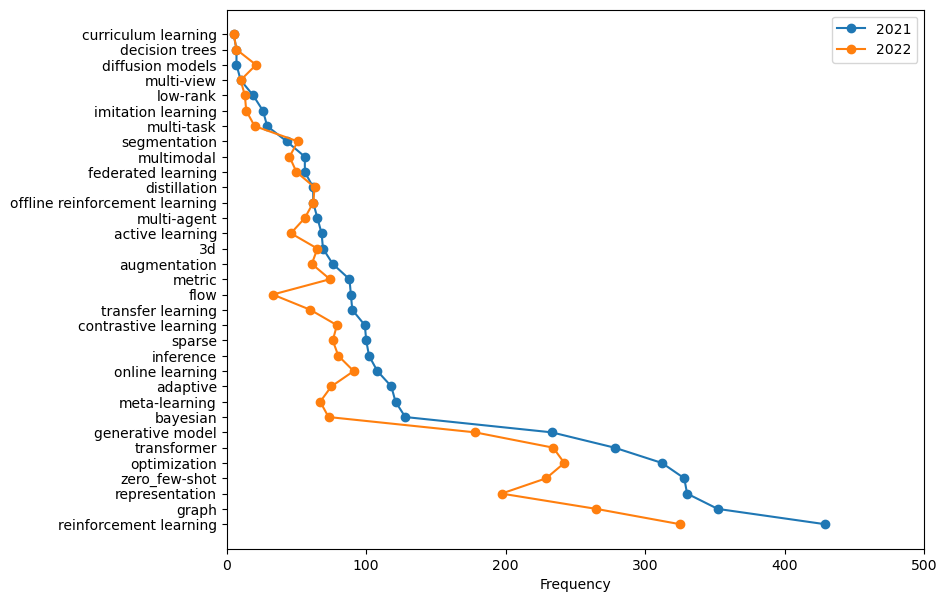

In [44]:
import numpy as np

sortby = '2021'
topic2freq_21 = {topic:freq for topic, freq in zip(topics, freq_21)}
topic2freq_22 = {topic:freq for topic, freq in zip(topics, freq_22)}

if sortby == '2021':
    topics_sorted = sorted(topic2freq_21.keys(), key=lambda x: topic2freq_21[x], reverse=True)
else:
    topics_sorted = sorted(topic2freq_22.keys(), key=lambda x: topic2freq_22[x], reverse=True)

topic2freq_21 = {topic:topic2freq_21[topic] for topic in topics_sorted}
topic2freq_22 = {topic:topic2freq_22[topic] for topic in topics_sorted}

plt.figure(figsize=(9,7))
plt.plot(topic2freq_21.values(), topic2freq_21.keys(), '-o', label='2021')
plt.plot(topic2freq_22.values(), topic2freq_22.keys(), '-o', label='2022')
plt.xlim([0, 500])
plt.xlabel('Frequency')
plt.legend()
plt.savefig('./figures/Topics_summary-2022.jpg', bbox_inches='tight')
plt.show()


- RL, graph, optimization, transformer, zero_few-shot, representation, and generative models are the popular topics in 2022
- Diffusion models, and segmentation are gaining popularity 
- Flow, meta-learning, adaptive, representation and graph decreased popularity 

Data not clear, potentially due to ICLR contains all submitted papers, rather than accepted ones.

## 2023 vs 2022

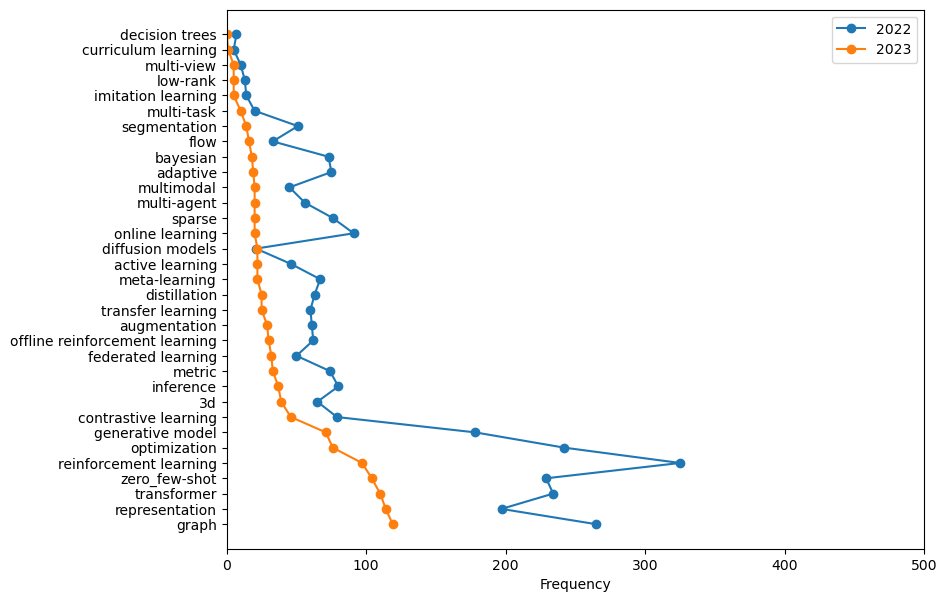

In [45]:
sortby = '2023'

topic2freq_22 = {topic:freq for topic, freq in zip(topics, freq_22)}
topic2freq_23 = {topic:freq for topic, freq in zip(topics, freq_23)}

if sortby == '2022':
    topics_sorted = sorted(topic2freq_22.keys(), key=lambda x: topic2freq_22[x], reverse=True)
else:
    topics_sorted = sorted(topic2freq_23.keys(), key=lambda x: topic2freq_23[x], reverse=True)

topic2freq_22 = {topic:topic2freq_22[topic] for topic in topics_sorted}
topic2freq_23 = {topic:topic2freq_23[topic] for topic in topics_sorted}

plt.figure(figsize=(9,7))
plt.plot(topic2freq_22.values(), topic2freq_22.keys(), '-o', label='2022')
plt.plot(topic2freq_23.values(), topic2freq_23.keys(), '-o', label='2023')
plt.xlim([0, 500])
plt.xlabel('Frequency')
plt.legend()
plt.savefig('./figures/Topics_summary-2023.jpg', bbox_inches='tight')
plt.show()


- Graph, representation, transformer, zero_few-shot, rl, optimization, generative models, zero_few-shot, contrastive learning, and 3d are the most popular topics in 2023
- Diffusion models is gaining popularity;